In [7]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys, os
sys.path.append(str('/home/loidolt/RowlandEtAl/popping-off/popoff/'))
import popoff
import loadpaths
from linear_model import PoolAcrossSessions
from Session import SessionLite

import matplotlib.pyplot as plt
import numpy as np

In [9]:
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}

plt.rc("axes.spines", top=False, right=False) # despine

plt.rcParams.update(params)

COLORS = [
'#228E5E', # Hit green
'#DB3713', # Miss red
]

In [ ]:
# Do you want to remove all cells that were ever targetted from all future analysis?
remove_targets = False
# Do you want to just analyse the three 'training set' sessions ([0,3,7]) indexes hardcoded
# as keep_sessions variable in PoolAcrossSessions
subsample_sessions = True
# Set hits with first lick < 250ms as toosoon?
remove_toosoon = True
# Build the PoolAcrossSessions object
pas = PoolAcrossSessions(save_PCA=False, remove_targets=remove_targets, subsample_sessions=subsample_sessions,
                         remove_toosoon = remove_toosoon)

In [17]:
pas.sessions

{3: instance Mouse J064, run 10 of Session class,
 7: instance Mouse RL070, run 29 of Session class}

In [6]:
# pas contains a list of linear_model objects
linear_model = pas.linear_models[1]
# And this contains the session object
session = linear_model.session

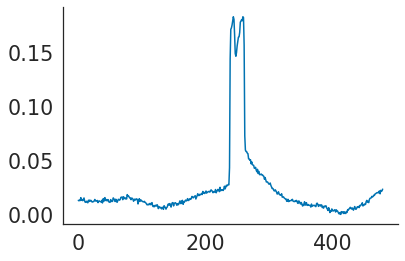

In [7]:
# Linear Model has the fluoresence data structure and indexing variables
plt.plot(np.mean(linear_model.flu, (0,1))) # All trials average with the artifact

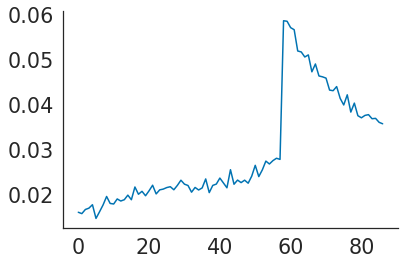

In [8]:
flu = linear_model.flu[:, :, linear_model.remove_artifact]  # With the artifact snipped out
plt.plot(np.mean(flu, (0,1)))   

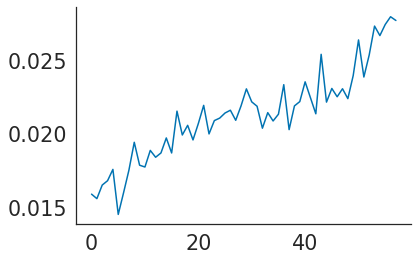

In [9]:
flu = linear_model.flu[:, :, linear_model.pre]  # Just the pre-frames
plt.plot(np.mean(flu, (0,1)))   

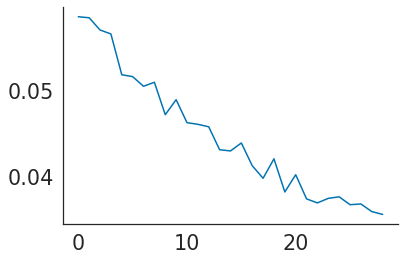

In [10]:
flu = linear_model.flu[:, :, linear_model.post]  # Just the post-frames
plt.plot(np.mean(flu, (0,1)))   

([12.726922229291876,
  6.042025855603274,
  3.0922190069223823,
  1.8376470443952326,
  1.4508702933501922],
 array([[ 0.07633337,  0.04550368,  0.01928461, ...,  0.07428516,
          0.06725611,  0.01442801],
        [ 0.07812106, -0.11076199, -0.01559523, ...,  0.03198149,
          0.03425559,  0.01228505],
        [ 0.01089649, -0.0275919 , -0.00302529, ...,  0.07426867,
          0.05207681,  0.01499075],
        [ 0.02208608, -0.09190173, -0.08990203, ...,  0.00559692,
          0.00905403,  0.00722732],
        [ 0.00016221, -0.0243221 ,  0.00534065, ...,  0.04469262,
         -0.05387039,  0.05789433]]))

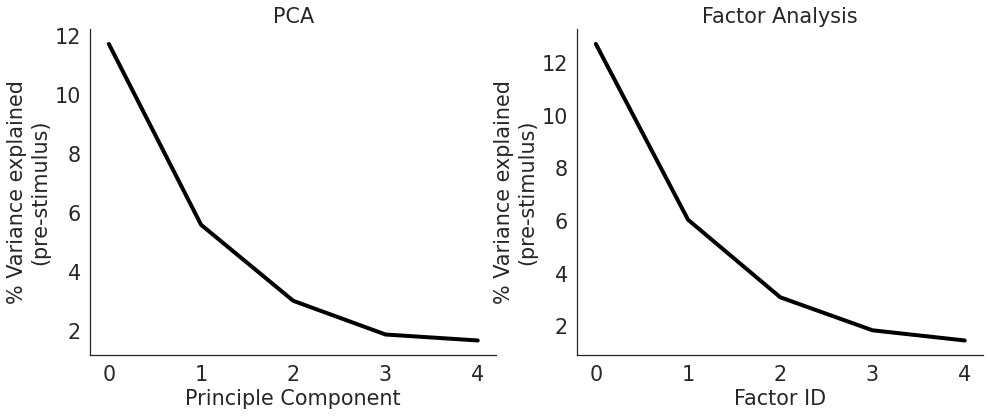

In [11]:
from linear_model import do_pca, do_fa
n_components = 5
trial = 10
matrix = session.behaviour_trials[:, :, trial]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('PCA')
do_pca(matrix, n_components=n_components, plot=True)
plt.subplot(1,2,2)
plt.title('Factor Analysis')
do_fa(matrix, n_components=n_components, plot=True)
    
    

In [12]:
for trial in range(session.n_trials):
    
    matrix = session.behaviour_trials[:, :, trial]
    pca_var, _ = do_pca(matrix, 5, plot=False)
    fa_var, _ = do_fa(matrix, 5, plot=False)
    
    plt.plot([0,1], [pca_var[0]*100, fa_var[0]], color='black', marker='o')
    
plt.ylim(0, 30)
plt.xticks([0,1], ['PCA', 'FA'])
plt.ylabel('% variance explained\nby first component/factor')

ValueError: too many values to unpack (expected 2)